In [185]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [170]:
def Regression(train, test, target, columns, scaler, model):

    X_train = train[columns]
    y_train = train[target]
    X_test = test[columns]
    y_test = test[target]

    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred)**0.5
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test, 'r',label='True')
    plt.plot(pred, '--b',label='Predict')
    plt.title(f'{target}\n{model}\nR2: {r2:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}')
    plt.legend(loc='upper left')
    plt.show()
    
    return model

In [171]:
train = pd.read_csv('../investing_data/numeric_train.csv')
test = pd.read_csv('../investing_data/numeric_test.csv')

In [172]:
target = 'Samsung'
columns = train.columns[1:5].tolist() + train.columns[13:].tolist()

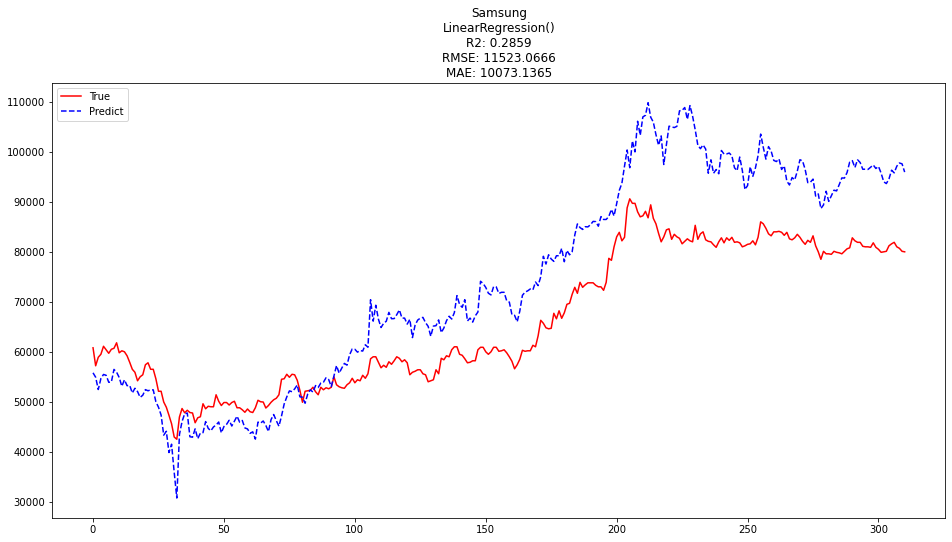

In [173]:
scaler = StandardScaler()
model = LinearRegression()

model = Regression(train, test, target, columns, scaler, model)

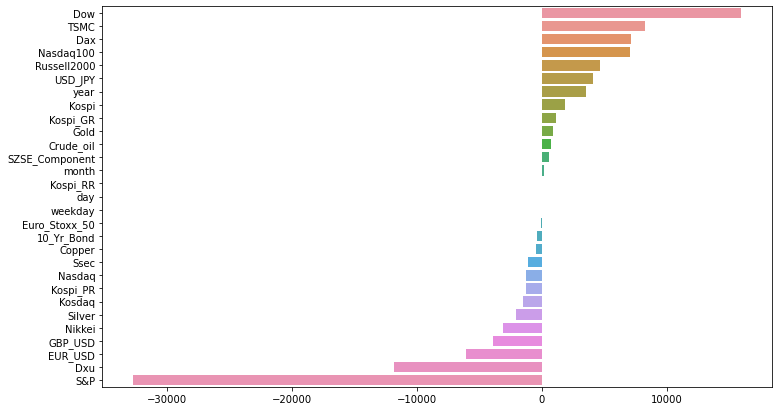

In [174]:
sr = pd.Series(model.coef_, index=train[columns].columns).sort_values(ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=sr, y=sr.index)
plt.show()

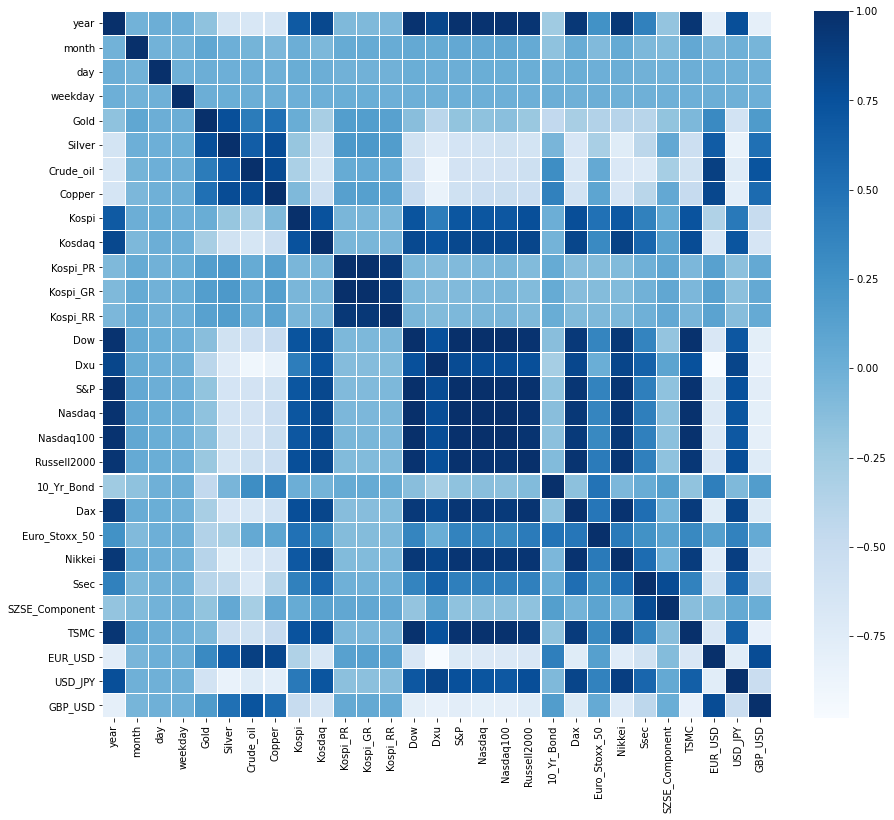

In [175]:
plt.figure(figsize=(15,13))
sns.heatmap(train[columns].corr(), cmap='Blues', linewidth=0.1)
plt.show()

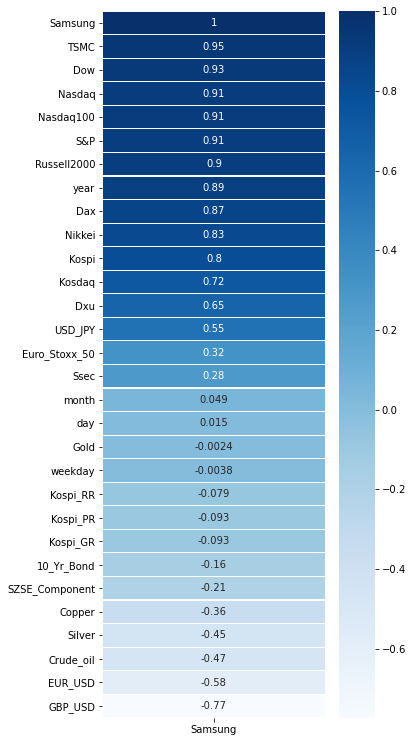

In [176]:
col = [target] + columns

plt.figure(figsize=(5,13))
sns.heatmap(train[col].corr()[['Samsung']].sort_values(by='Samsung', ascending=False), cmap='Blues', linewidth=0.1, annot=True)
plt.show()

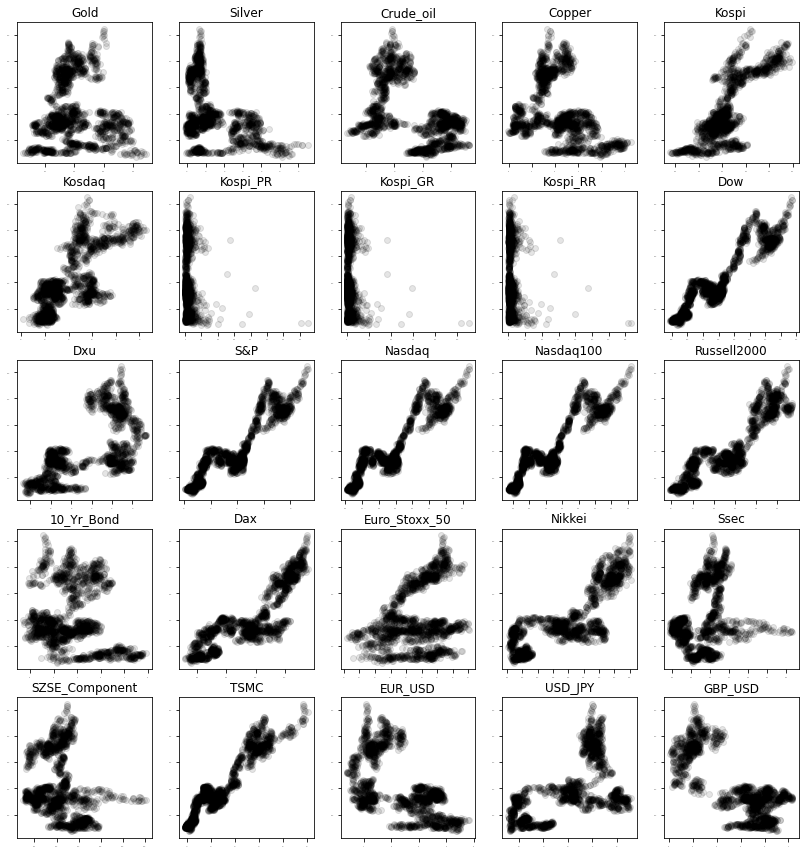

In [177]:
df = train[col]
c = df.columns[5:]

fig, axs = plt.subplots(figsize=(14,15), ncols=5, nrows=5)
for idx, feature in enumerate(c):
    col = idx % 5
    row = idx // 5
    axs[row, col].scatter(x=feature, y='Samsung', data=df, color='k', alpha=0.1)
    axs[row, col].set_title(feature)
    axs[row, col].tick_params(labelsize=0)
plt.show()

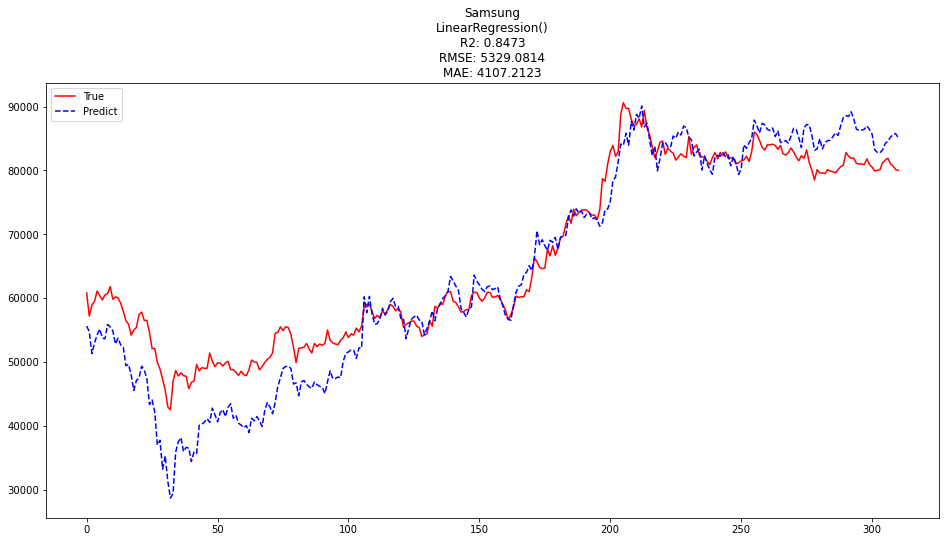

In [178]:
#비슷한 분포를 보이는 변수 제거, 모델 성능을 높이는 변수 추출

target = 'Samsung'
columns = ['year', 'Gold', 'Silver', 'Kospi',
           'Dow', 
           'Nasdaq', 'Russell2000',
           '10_Yr_Bond', 'Dax', 'Euro_Stoxx_50', 'Ssec',
           'TSMC', 'EUR_USD', 'USD_JPY', 'GBP_USD']


scaler = StandardScaler()
model = LinearRegression()

model = Regression(train, test, target, columns, scaler, model)

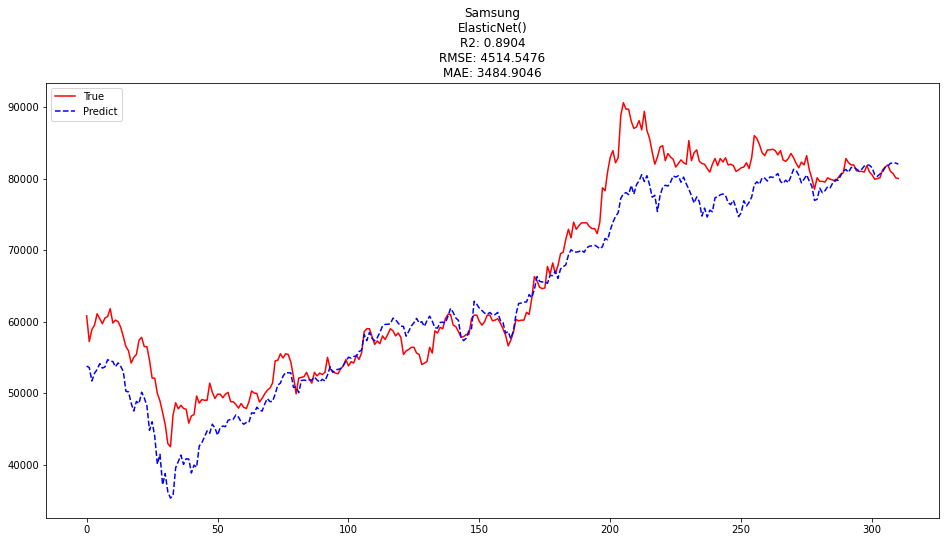

In [186]:
target = 'Samsung'
columns = ['year', 'Gold', 'Silver', 'Kospi',
           'Dow', 
           'Nasdaq', 'Russell2000',
           '10_Yr_Bond', 'Dax', 'Euro_Stoxx_50', 'Ssec',
           'TSMC', 'EUR_USD', 'USD_JPY', 'GBP_USD']


scaler = StandardScaler()
model = ElasticNet()

model = Regression(train, test, target, columns, scaler, model)